IMPORT LIBRARIES AND DATASET

#data set https://www.kaggle.com/mohansacharya/graduate-admissions

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict (1).csv


In [74]:
# read the csv file
import io
admission_df = pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))

#admission_df = pd.read_csv('Admission_Predict.csv')

In [75]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [76]:
#drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [77]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [78]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [79]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [80]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #4: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6676b26a0>,
      dtype=object)

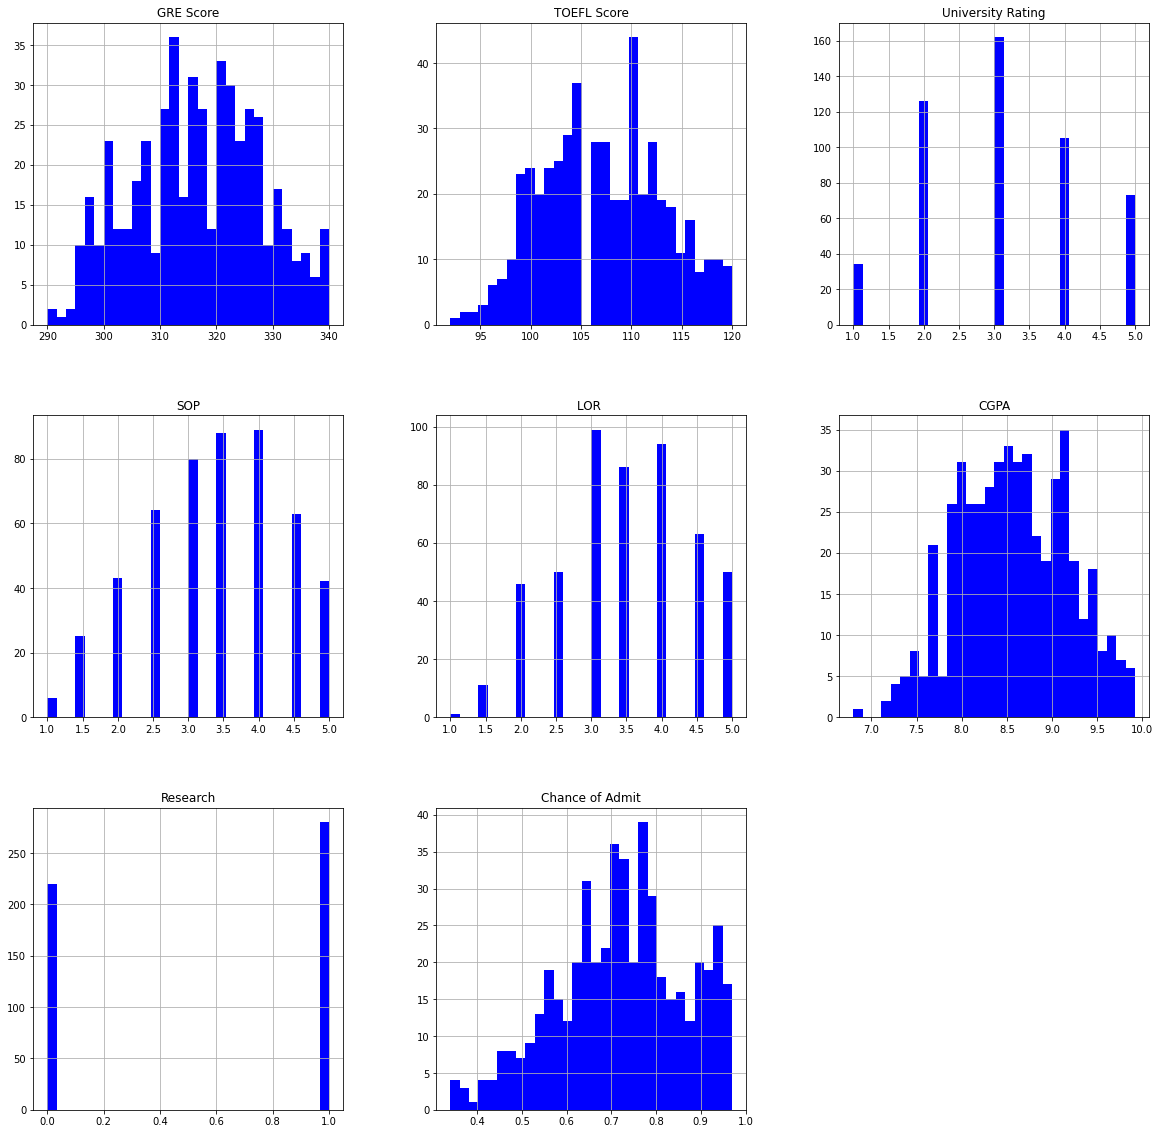

In [81]:
#making histogram(hist)
admission_df.hist(bins = 30, figsize = (20, 20), color = 'b')

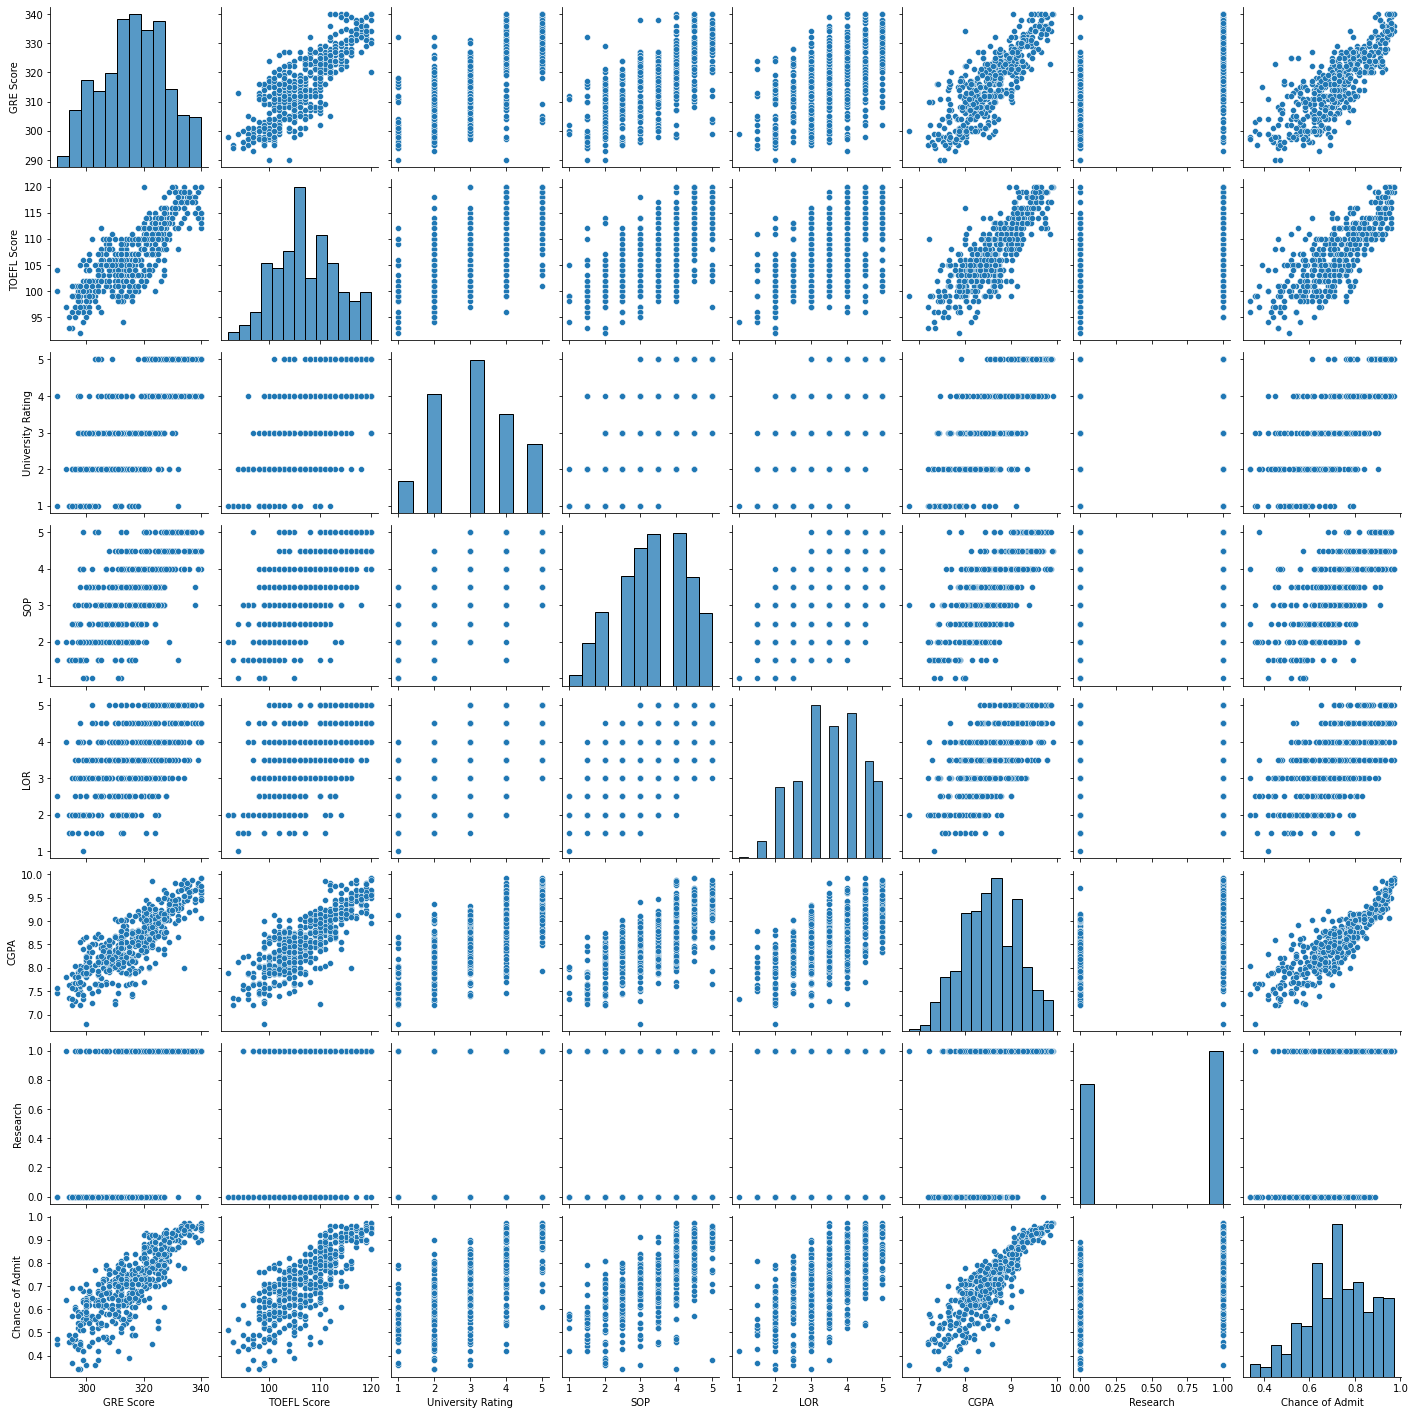

In [82]:
sns.pairplot(admission_df)

#chance of admission goes up if gre score goes up

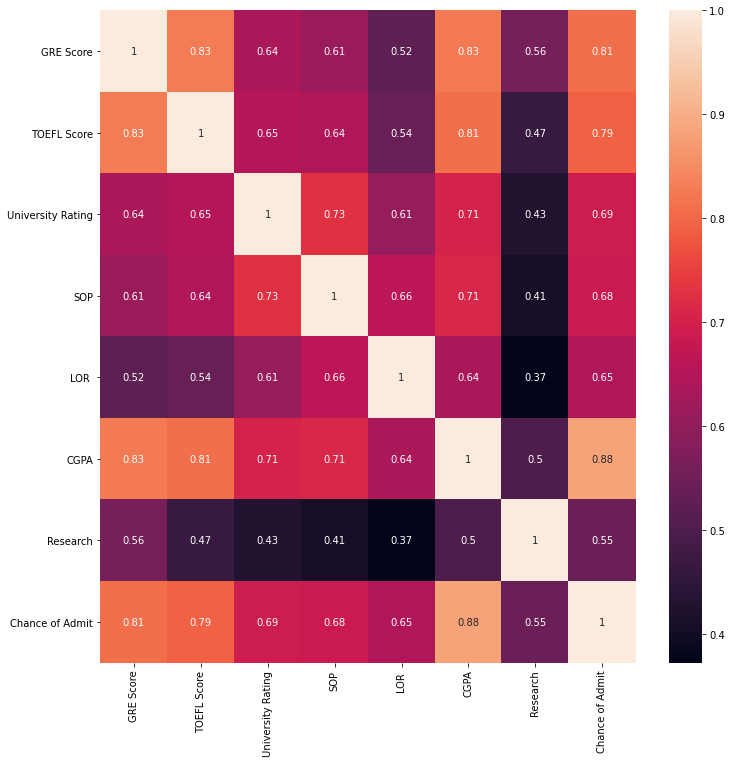

In [83]:
#correlation matrix and heatmap
corr_matrix = admission_df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)
plt.show()
  

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [84]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [85]:
#inputs
X = admission_df.drop(columns = ['Chance of Admit'])

In [86]:
y = admission_df['Chance of Admit']

In [87]:
X.shape

(500, 7)

In [88]:
y.shape

(500,)

In [89]:
y
#chance of admit of every single student

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [90]:
#convert the data to numpy array
X = np.array(X)
y = np.array(y)

#reshape the array
y = y.reshape(-1 , 1)
y.shape

(500, 1)

In [91]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [92]:
scaler_y = StandardScaler()
y = scaler_x.fit_transform(y)

In [93]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [95]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7833993376272129

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [98]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                400       
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_9 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_10 (Activation)   (None, 150)              

In [99]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [100]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6601 - val_loss: 0.2208
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3907 - val_loss: 0.2297
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3314 - val_loss: 0.1973
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3324 - val_loss: 0.2189
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2333 - val_loss: 0.2078
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2514 - val_loss: 0.1954
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2624 - val_loss: 0.2034
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2206 - val_loss: 0.1966
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2477 - val_loss: 0.1914
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2442 - val_loss: 0.1906
Epoch 11/

In [101]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.2320
Accuracy : 0.767954632639885


In [102]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

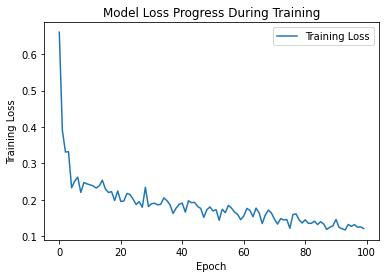

In [103]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [104]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [105]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5470396114877969

In [106]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [107]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth = 10)
RandomForest_model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [108]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest 


0.7578845050831559

# TASK #9: UNDERSTAND VARIOUS REGRESSION KPIs

# TASK #10: CALCULATE REGRESSION MODEL KPIs

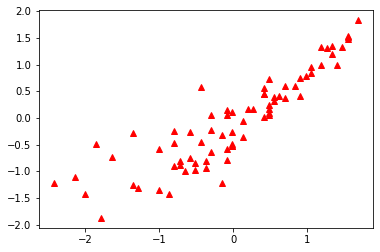

In [109]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^',color ='r')

In [110]:
from sklearn.preprocessing import StandardScaler
y_predict_orig = scaler_y.fit_transform(y_predict) 
y_test_orig = scaler_y.fit_transform(y_test)


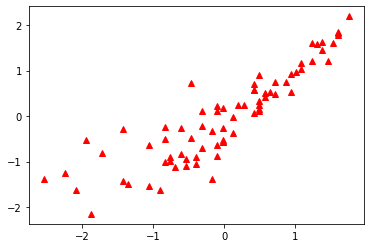

In [113]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [114]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [115]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.476 
MSE = 0.2268963845315601 
MAE = 0.35945718778912555 
R2 = 0.7731036154684399 
Adjusted R2 = 0.7493980230546948
